In [1]:
import pandas as pd
import numpy as np
import re
import time

import bs4 as bs4
import json

import glob
import tqdm

pd.set_option("max.columns", 131)

#https://strftime.org/
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
df = pd.read_csv("dados/raw_data_with_labels.csv")
df = df[df['y'].notnull()]
df.shape

(772, 21)

In [6]:
df.head()

,link,webpage_url,title,y,query,view_count,like_count,dislike_count,average_rating,subscriber_count,description,categories,tags,upload_date,tempo_desde_pub,channel_url,thumbnail,width,height,resolution,fps
0,watch?v=eUslDxZfjGc,https://www.youtube.com/watch?v=eUslDxZfjGc,Hands-on Training in Artificial Intelligence w...,1.0,datascience,379,25.0,2.0,4.846154,14600.0,NaN,['Entertainment'],NaN,2020-11-17,0,http://www.youtube.com/channel/UCF2_gALht1C1Ns...,https://i.ytimg.com/vi/eUslDxZfjGc/maxresdefau...,1280,720,NaN,30
1,watch?v=0f60PduPRYE,https://www.youtube.com/watch?v=0f60PduPRYE,How to LEARN DATA SCIENCE & Machine Learning f...,0.0,datascience,124,10.0,NaN,5.000000,1860.0,The most important trait that one can have whe...,['Science & Technology'],"['how to learn data science', 'machine learnin...",2020-11-15,2,http://www.youtube.com/channel/UCHz35rvIKf2CMq...,https://i.ytimg.com/vi_webp/0f60PduPRYE/maxres...,1920,1080,NaN,30
2,watch?v=nFzgPVwr5vo,https://www.youtube.com/watch?v=nFzgPVwr5vo,Data Science Indonesia Profile,0.0,datascience,13,2.0,NaN,5.000000,499.0,Do not hesitate to contact us at partnership@,['Science & Technology'],NaN,2020-11-14,3,http://www.youtube.com/channel/UCl06JMPTufaug4...,https://i.ytimg.com/vi/nFzgPVwr5vo/hqdefault.j...,1920,1080,NaN,30
3,watch?v=tgS3NXMfmI0,https://www.youtube.com/watch?v=tgS3NXMfmI0,Hands-On Training in Artificial Intelligence w...,1.0,datascience,655,32.0,2.0,4.878788,14600.0,NaN,['Entertainment'],NaN,2020-11-12,5,http://www.youtube.com/channel/UCF2_gALht1C1Ns...,https://i.ytimg.com/vi/tgS3NXMfmI0/maxresdefau...,1280,720,NaN,30
4,watch?v=mO47WN4PT_Y,https://www.youtube.com/watch?v=mO47WN4PT_Y,Hands-On Training in AI with DataScience | Day-5,1.0,datascience,1,31.0,NaN,5.000000,14600.0,NaN,['Entertainment'],NaN,2020-11-10,7,http://www.youtube.com/channel/UCF2_gALht1C1Ns...,https://i.ytimg.com/vi/mO47WN4PT_Y/maxresdefau...,1280,720,NaN,30


In [7]:
df.tail()

,link,webpage_url,title,y,query,view_count,like_count,dislike_count,average_rating,subscriber_count,description,categories,tags,upload_date,tempo_desde_pub,channel_url,thumbnail,width,height,resolution,fps
1671,watch?v=wC4YV8t40zU,https://www.youtube.com/watch?v=wC4YV8t40zU,"Talks # 5: Parul Pandey: Data Science, Diversi...",0.0,kaggle,3,194.0,4.0,4.919192,34300.0,"Title: Data Science, Diversity and",['Education'],NaN,2020-06-19,151,http://www.youtube.com/channel/UCBPRJjIWfyNG4X...,https://i.ytimg.com/vi/wC4YV8t40zU/maxresdefau...,1920,1080,NaN,30
1672,watch?v=62HBi0B3se0,https://www.youtube.com/watch?v=62HBi0B3se0,"Ep.04 ""My Journey Into Data Science"" with Abhi...",0.0,kaggle,2,101.0,4.0,4.847619,31800.0,In this episode we discuss Abhishek Thakur's t...,['Science & Technology'],"['artificial intelligence', 'analytics', 'mach...",2020-06-18,152,http://www.youtube.com/channel/UCAlwrsgeJavG1v...,https://i.ytimg.com/vi_webp/62HBi0B3se0/maxres...,1920,1080,NaN,30
1673,watch?v=R8gLOuGYW8w,https://www.youtube.com/watch?v=R8gLOuGYW8w,Predict Future Sales | Kaggle | Code review,1.0,kaggle,1,18.0,2.0,4.600000,57.0,Jump on the opportunity to challenge Predict F...,['People & Blogs'],"['data science projects for beginners', 'artif...",2020-06-14,156,http://www.youtube.com/channel/UC0IDKS24GVFdZP...,https://i.ytimg.com/vi_webp/R8gLOuGYW8w/maxres...,1920,1080,NaN,30
1674,watch?v=VeM1T7UaYTk,https://www.youtube.com/watch?v=VeM1T7UaYTk,"Maximilian Jeblick | Physics, Math and Data Sc...",0.0,kaggle,201,NaN,NaN,5.000000,14200.0,Chai Time Data Science Playlist: https://www.y...,['Science & Technology'],NaN,2020-06-11,159,http://www.youtube.com/channel/UCk6ONJlPzjw3Do...,https://i.ytimg.com/vi_webp/VeM1T7UaYTk/maxres...,1920,1080,NaN,25
1675,watch?v=PSvEh8ukf-c,https://www.youtube.com/watch?v=PSvEh8ukf-c,Uploading dataset from Kaggle directly to Goog...,0.0,kaggle,140,20.0,NaN,5.000000,90.0,Source Code : https://github.com/DazedGorilla/...,['People & Blogs'],"['kaggle', 'data science', 'machine learning',...",2020-06-16,154,http://www.youtube.com/channel/UCXfkj6tr8yLqrC...,https://i.ytimg.com/vi_webp/PSvEh8ukf-c/maxres...,1920,1080,NaN,30


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [9]:
df_limpo = pd.DataFrame(index=df.index)

## 1. Limpeza da data

In [10]:
df_limpo['date'] = pd.to_datetime(df['upload_date'], format='%Y-%m-%d')
df_limpo['date']

0      2020-11-17
1      2020-11-15
2      2020-11-14
3      2020-11-12
4      2020-11-10
          ...    
1671   2020-06-19
1672   2020-06-18
1673   2020-06-14
1674   2020-06-11
1675   2020-06-16
Name: date, Length: 772, dtype: datetime64[ns]

## 2. Limpeza de Views

In [11]:
df_limpo['views'] = df['view_count'].map(lambda x: 0 if x<0 else int(x))
df_limpo['views']

0       379
1       124
2        13
3       655
4         1
       ... 
1671      3
1672      2
1673      1
1674    201
1675    140
Name: views, Length: 772, dtype: int64

## 3. Features

Data da coleta das informações: '2020-11-21 11:38:37.183788'

In [12]:
features = pd.DataFrame(index=df_limpo.index)
y = df['y'].copy()

In [17]:
(datetime.datetime.strptime('2020-11-21', "%Y-%m-%d") - df_limpo['date']) / np.timedelta64(1, 'D')

0         4.0
1         6.0
2         7.0
3         9.0
4        11.0
        ...  
1671    155.0
1672    156.0
1673    160.0
1674    163.0
1675    158.0
Name: date, Length: 772, dtype: float64

In [19]:
data_extract = datetime.datetime.strptime('2020-11-21', "%Y-%m-%d")

In [20]:
features['tempo_desde_pub'] = (data_extract - df_limpo['date']) / np.timedelta64(1, 'D')
features['views'] = df_limpo['views']
features['views_por_dia'] = features['views'] / features['tempo_desde_pub']
features = features.drop(['tempo_desde_pub'], axis=1)

In [12]:
str(datetime.datetime.today())

'2020-11-21 11:38:37.183788'

In [21]:
features.head()

,views,views_por_dia
0,379,94.750000
1,124,20.666667
2,13,1.857143
3,655,72.777778
4,1,0.090909


<AxesSubplot:>

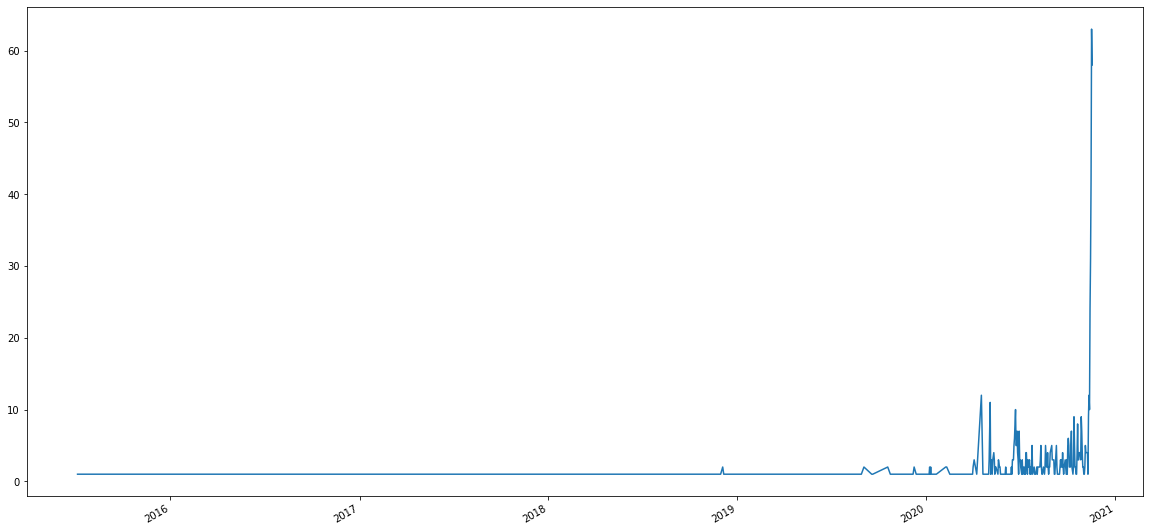

In [22]:
df_limpo['date'].value_counts().plot(figsize=(20,10))

In [23]:
data_corte = "2020-10-01"
Xtrain, Xval = features[df_limpo['date'] < data_corte], features[df_limpo['date'] >= data_corte]
ytrain, yval = y[df_limpo['date'] < data_corte], y[df_limpo['date'] >= data_corte]
Xtrain.shape, Xval.shape, ytrain.shape, yval.shape

((385, 2), (387, 2), (385,), (387,))

In [24]:
ytrain.mean()

0.43376623376623374

In [25]:
mdl = DecisionTreeClassifier(random_state=0, max_depth=2, class_weight="balanced")
mdl.fit(Xtrain, ytrain)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, random_state=0)

#### Probabilidade de ser 1

In [26]:
p = mdl.predict_proba(Xval)[:, 1]

In [27]:
from sklearn.metrics import roc_auc_score, average_precision_score

#### Precision = de todos os exemplos positivos quantos ele realmente acertou
#### Recall = taxa de detecção de todos os exemplos que sao realmente positivos quantos foram detectados
### Average Precision Score -> area sobre a curva de todos os pontos de corte para Precision e Recall

In [28]:
average_precision_score(yval, p)

0.39154546214519237

#### AUC -> dado as probabilidades positivas e negativas ele pega aleatoriamente pares (pode ter repeticao) e acumula a quantidade de vitorias (True ou False) e entao calcula quantos % sobre o total acumulado

In [29]:
roc_auc_score(yval, p)

0.5129028590916842

In [30]:
from sklearn.tree import plot_tree

[Text(279.0, 453.0, 'views_por_dia <= 0.353\ngini = 0.5\nsamples = 385\nvalue = [192.5, 192.5]'),
 Text(139.5, 271.8, 'views_por_dia <= 0.008\ngini = 0.489\nsamples = 223\nvalue = [97.133, 130.254]'),
 Text(69.75, 90.59999999999997, 'gini = 0.166\nsamples = 14\nvalue = [11.479, 1.153]'),
 Text(209.25, 90.59999999999997, 'gini = 0.48\nsamples = 209\nvalue = [85.654, 129.102]'),
 Text(418.5, 271.8, 'views <= 103.5\ngini = 0.478\nsamples = 162\nvalue = [95.367, 62.246]'),
 Text(348.75, 90.59999999999997, 'gini = 0.265\nsamples = 48\nvalue = [37.087, 6.916]'),
 Text(488.25, 90.59999999999997, 'gini = 0.5\nsamples = 114\nvalue = [58.28, 55.329]')]

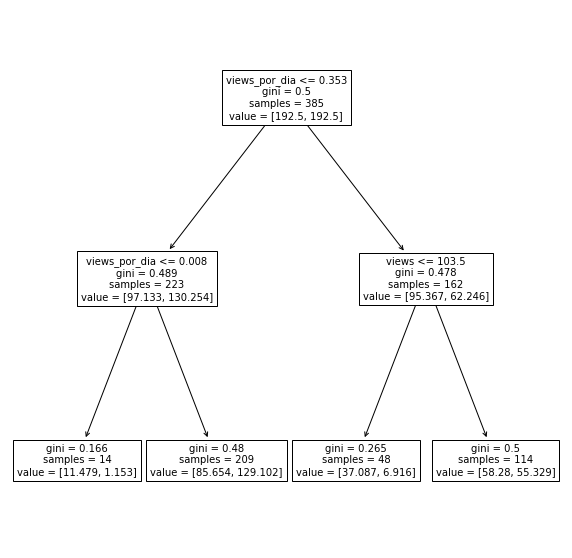

In [31]:
fig, ax = pylab.subplots(1,1, figsize=(10,10))
plot_tree(mdl, ax=ax, feature_names=Xtrain.columns)